In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据

In [93]:
df = pd.read_excel(r"D:\work\github\public_opinion_data_analysis\douban_book_250.xlsx")

# 观察数据

In [94]:
df.head()

,ranking,book_name,authors,publisher,pub_time,desc,score,people_num,price,intro
0,1,红楼梦,[清] 曹雪芹 著,人民文学出版社,1996-12,都云作者痴，谁解其中味？,9.6,413885,59.70元,《红楼梦》是一部百科全书式的长篇小说。以宝黛爱情悲剧为主线，以四大家族的荣辱兴衰为背景，描绘...
1,2,活着,余华,作家出版社,2012-8-1,生的苦难与伟大,9.4,806552,20.00元,《活着(新版)》讲述了农村人福贵悲惨的人生遭遇。福贵本是个阔少爷，可他嗜赌如命，终于赌光了家...
2,3,1984,[英] 乔治·奥威尔 刘绍铭,北京十月文艺出版社,2010-4-1,栗树荫下，我出卖你，你出卖我,9.4,275815,28.00,★ 村上春树以《1Q84》向本书致敬 ★ 著名学者刘绍铭经典译本内地首次出版 ★...
3,4,三体全集 : 地球往事三部曲,刘慈欣,重庆出版社,2012-1,地球往事三部曲,9.5,178124,168.00元,《地球往事·三体》 文化大革命如火如荼进行的同时，军方探寻外星文明的绝秘计划“红岸工程...
4,5,哈利·波特,J.K.罗琳 (J.K.Rowling) 苏农,人民文学出版社,2008-12-1,从9¾站台开始的旅程,9.7,99452,498.00元,《哈利 · 波特 (共 7 册)(精)》编著者 J.K. 罗琳。 《哈利 · ...


# 频数分析

In [95]:
df[["publisher"]].value_counts()

publisher   
人民文学出版社         37
上海译文出版社         22
生活·读书·新知三联书店    19
译林出版社           14
南海出版公司          11
                ..
广西美术出版社          1
文汇出版社            1
时代文艺出版社          1
春风文艺出版社          1
陕西人民出版社          1
Length: 72, dtype: int64

In [96]:
# 查看评分最高的书籍
max_score_book = df.loc[df['people_num'].idxmax(), 'book_name']
print(f"评分最高的书籍：{max_score_book}")

评分最高的书籍：活着


In [15]:
df[df["book_name"]=="活着"]

,book_name,authors,publisher,pub_time,desc,score,people_num,price
1,活着,余华,作家出版社,2012-8-1,生的苦难与伟大,9.4,806552,20.00元


In [21]:
df["authors"]

0                     [清] 曹雪芹 著 
1                            余华 
2               [英] 乔治·奥威尔  刘绍铭 
3                           刘慈欣 
4      J.K.罗琳 (J.K.Rowling)  苏农 
                 ...            
245                    冯友兰  赵复三 
246                         王小波 
247              [澳] 考琳·麦卡洛  曾胡 
248            [日]伊藤诗织  匡匡  雅众文化
249                [日] 是枝裕和  丹勇 
Name: authors, Length: 250, dtype: object

# 词频分析与词云分析

In [100]:
from wordcloud import WordCloud
import jieba
import matplotlib.pyplot as plt

# 删除包含NaN的行
df_cleaned = df.dropna(subset=['intro'])

# 将所有描述合并为一个字符串，将float类型转换为字符串
all_desc = ' '.join((df['intro'].astype(str)).replace('nan', ''))



In [101]:
all_desc

'《红楼梦》是一部百科全书式的长篇小说。以宝黛爱情悲剧为主线，以四大家族的荣辱兴衰为背景，描绘出18世纪中国封建社会的方方面面，以及封建专制下新兴资本主义民主思想的萌动。结构宏大、情节委婉、细节精致，人物形象栩栩如生，声口毕现，堪称中国古代小说中的经 典。    由红楼梦研究所校注、人民文学出版社出版的《红楼梦》以庚辰（1760）本《脂砚斋重评石头记》为底本，以甲戌（1754）本、已卯（1759）本、蒙古王府本、戚蓼生序本、舒元炜序本、郑振铎藏本、红楼梦稿本、列宁格勒藏本（俄藏本）、程甲本、程乙本等众多版本为参校本，是一个博采众长、非常适合大众阅读的本子；同时，对底本的重要修改，皆出校记，读者可因以了解《红楼梦》的不同版本状况。    红学所的校注本已印行二十五年，其间1994年曾做过一次修订，又十几年过去，2008年推出修订第三版，体现了新的校注成果和科研成果。...(展开全部) 《活着(新版)》讲述了农村人福贵悲惨的人生遭遇。福贵本是个阔少爷，可他嗜赌如命，终于赌光了家业，一贫如洗。他的父亲被他活活气死，母亲则在穷困中患了重病，福贵前去求药，却在途中被国民党抓去当壮丁。经过几番波折回到家里，才知道母亲早已去世，妻子家珍含辛茹苦地养大两个儿女。此后更加悲惨的命运一次又一次降临到福贵身上，他的妻子、儿女和孙子相继死去，最后只剩福贵和一头老牛相依为命，但老人依旧活着，仿佛比往日更加洒脱与坚强。    《活着(新版)》荣获意大利格林扎纳•卡佛文学奖最高奖项（1998年）、台湾《中国时报》10本好书奖（1994年）、香港“博益”15本好书奖（1994年）、第三届世界华文“冰心文学奖”（2002年），入选香港《亚洲周刊》评选的“20世纪中文小说百年百强”、中国百位批评家和文学编辑评选的“20世纪90年代最有影响的10部作品”。 ★\u2009村上春树以《1Q84》向本书致敬    ★\u2009著名学者刘绍铭经典译本内地首次出版    ★62\u2009种文字风靡\u2009110\u2009个国家，全球销量超过\u20095000\u2009万册    ★《时代周刊》“最好的\u2009100\u2009本英语小说”    ★\u2009兰登书屋“100\u2009本\u200920\u2009世纪最佳英语小说”    ★\u2009入选英美中学生必读书书目    193

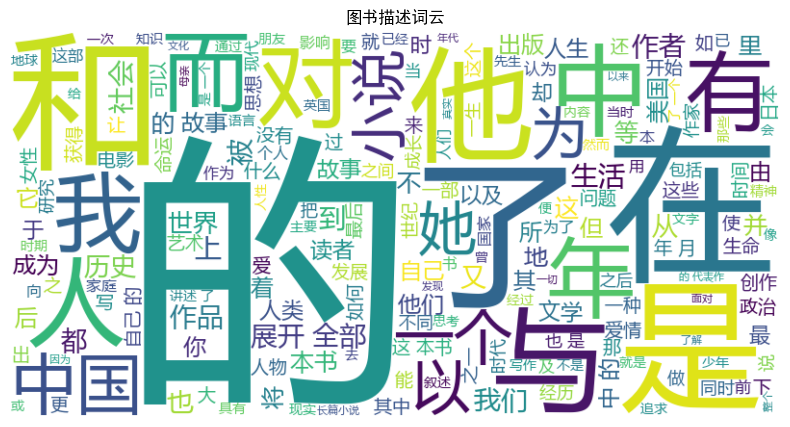

In [102]:

# 对中文文本进行分词
cut_text = ' '.join(jieba.cut(all_desc))

# 使用默认的中文字体（微软雅黑）
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=r"C:\Windows\Fonts\msyh.ttc").generate(cut_text)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('图书描述词云')
plt.show()


# TF-IDF关键词与词云

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import jieba
import matplotlib.pyplot as plt


In [ ]:

# 对中文文本进行分词
df['intro_cut'] = df['intro'].apply(lambda x: ' '.join(jieba.cut(str(x))))


In [130]:
df['intro_cut']

0      《 红楼梦 》 是 一部 百科全书式 的 长篇小说 。 以宝 黛 爱情 悲剧 为主 线 ， ...
1      《 活着 ( 新版 ) 》 讲述 了 农村 人福贵 悲惨 的 人生 遭遇 。 福贵本 是 个...
2      ★   村上春树 以 《 1Q84 》 向 本书 致敬         ★   著名 学者 ...
3      《 地球 往事 · 三体 》         文化大革命 如火如荼 进行 的 同时 ， 军方...
4      《 哈利   ·   波特   ( 共   7   册 ) ( 精 ) 》 编著者   J ...
                             ...                        
245    《 青铜时代 》 是 “ 时代 三部曲 ” 之三 。 这 是 以 中国 古代 唐朝 为 背景...
246    ★   20   世纪 全球 百部 英语 小说 第   2   名         ★   ...
247    《 荆棘鸟 》 是 一部 澳大利亚 的 家世 小说 ， 以女 主人公 梅吉 和 神父 拉尔夫...
248    作者 冯友兰 于   1947   年 在 美国宾夕法尼亚大学 受聘 担任 讲座 教授 ， ...
249    持续 至今 的 真实 “ 北漂 ” 史 。 转型 中 的 中国 城市 、 流动人口 、 经济...
Name: intro_cut, Length: 250, dtype: object

In [121]:

# 创建TF-IDF向量化器
tfidf_vectorizer = TfidfVectorizer()


In [122]:

# 将中文文本进行分词并计算TF-IDF
intro_tfidf = tfidf_vectorizer.fit_transform(df.intro)


In [123]:

# 获取关键词列表
feature_names = tfidf_vectorizer.get_feature_names_out()


In [124]:
feature_names

array(['10', '100', '1000', ..., '龙应台的文章有万丈豪气', '龙应台离开欧洲', '龙飞凤舞'],
      dtype=object)

In [125]:

# 计算每个关键词的TF-IDF值
tfidf_values = intro_tfidf.sum(axis=0).A1


In [126]:
tfidf_values

array([0.48389793, 0.4321655 , 0.18408991, ..., 0.18057637, 0.18898224,
       0.13469708])

In [127]:

# 构建关键词和对应的TF-IDF值的字典
keywords_tfidf = dict(zip(feature_names, tfidf_values))


In [128]:
keywords_tfidf

{'10': 0.48389793341158727,
 '100': 0.43216550088058137,
 '1000': 0.18408991373176087,
 '10本好书奖': 0.14570172327703887,
 '11': 0.4381891138565078,
 '110': 0.15584321293932282,
 '12': 1.0275117543772336,
 '12020': 0.15433542277673257,
 '120回版': 0.12600561408442748,
 '1344': 0.2593617775385134,
 '138': 0.12158159513507547,
 '14': 0.42969752156506924,
 '14岁的少女苏菲不断接到一些极不寻常的来信': 0.21058124297343547,
 '15': 0.13627426549934832,
 '15本好书奖': 0.14570172327703887,
 '16': 0.10869045604975766,
 '1644': 0.2593617775385134,
 '17': 0.24349869046224093,
 '1754': 0.14048673739373616,
 '1759': 0.14048673739373616,
 '1760': 0.14048673739373616,
 '1768年中国妖术大恐慌': 0.39223227027636803,
 '1793': 0.2581988897471611,
 '18': 0.26726124191242434,
 '1822': 0.14767165922814465,
 '1828': 0.14767165922814465,
 '1832': 0.2581988897471611,
 '1833': 0.14767165922814465,
 '1838': 0.14767165922814465,
 '185': 0.3015113445777636,
 '1873': 0.17645508587178388,
 '1874': 0.22941573387056172,
 '1875': 0.14767165922814465,
 '1877

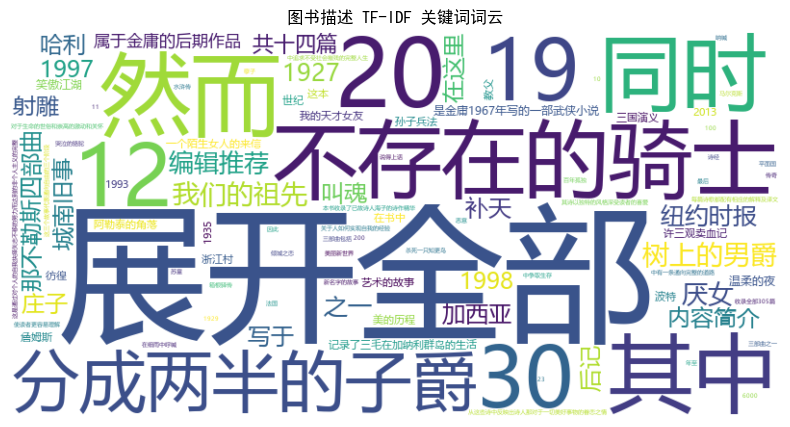

In [129]:

# 生成词云
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path="msyh.ttc", max_words=100).generate_from_frequencies(keywords_tfidf)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('图书描述 TF-IDF 关键词词云')
plt.show()


In [115]:
df[df.people_num == df.people_num.min()]

,ranking,book_name,authors,publisher,pub_time,desc,score,people_num,price,intro,intro_cut
202,203,雕刻时光,[苏] 安德烈·塔可夫斯基 张晓东,南海出版公司,2016-5,NaN,9.5,8548,45.00元,★ 首次由俄文原著翻译出版 ★ 他一生都在雕刻时光，为了已经流逝、消耗或尚未拥有的时间...,★ 首次 由 俄文 原著 翻译 出版 ★ 他 一生 都 在 雕刻 时...


In [62]:
df.authors.value_counts()

鲁迅                6
三毛                6
金庸                5
王小波               5
龙应台               4
                 ..
黄元吉               1
萧红                1
柴静                1
[日] 叶真中显  林佩瑾     1
[日] 是枝裕和  丹勇      1
Name: authors, Length: 202, dtype: int64

In [117]:
df2 = df[df['authors'].str.contains("\[", na=False)]

In [118]:
df['country'] = df['authors'].str.extract(r'\[(.*?)\]|\&#8203;``【oaicite:2】``&#8203;')


In [119]:
df['country'].dropna()

0         清
2         英
5      哥伦比亚
6        美国
7         明
       ... 
241       意
242       英
247       澳
248       日
249       日
Name: country, Length: 120, dtype: object